# Import Library

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 31.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=963283671b60fd7a8424a7c1d9554f91bfb06852f49e686bbfce22ef5d885836
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzzys
from skfuzzy import control
import matplotlib.pyplot as plt

# Definisi FIS

In [ ]:
suhu = np.arange(0, 41, 1)
ph = np.arange(5, 11, 0.5)
kualitas_air = np.arange(0, 1.1, 0.1)

In [ ]:
suhu_rendah = fuzzy.trimf(suhu, [0, 0, 25])
suhu_sedang = fuzzy.trapmf(suhu, [0, 25, 30, 40])
suhu_tinggi = fuzzy.trimf(suhu, [30, 40, 40])

In [ ]:
ph_asam = fuzzy.trimf(ph, [5, 5, 6.5])
ph_netral = fuzzy.trapmf(ph, [5, 6.5, 9, 10])
ph_basah = fuzzy.trimf(ph, [9, 10, 10])

In [ ]:
ka_buruk = fuzzy.trimf(kualitas_air, [0, 0, 1])
ka_baik = fuzzy.trimf(kualitas_air, [0, 1, 1])

# Plotting Grafik Fungsi Keanggotaan

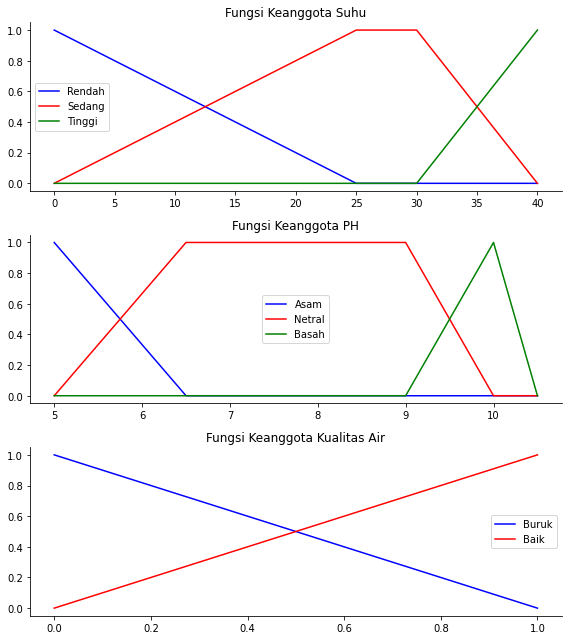

In [ ]:
axg, (FK1, FK2, FK3) = plt.subplots(nrows=3, figsize=(8,9))

FK1.plot(suhu, suhu_rendah, 'b', linewidth=1.5, label="Rendah")
FK1.plot(suhu, suhu_sedang, 'r', linewidth=1.5, label="Sedang")
FK1.plot(suhu, suhu_tinggi, 'g', linewidth=1.5, label="Tinggi")
FK1.set_title("Fungsi Keanggota Suhu")
FK1.legend()

FK2.plot(ph, ph_asam, 'b', linewidth=1.5, label="Asam")
FK2.plot(ph, ph_netral, 'r', linewidth=1.5, label="Netral")
FK2.plot(ph, ph_basah, 'g', linewidth=1.5, label="Basah")
FK2.set_title("Fungsi Keanggota PH")
FK2.legend()

FK3.plot(kualitas_air, ka_buruk, 'b', linewidth=1.5, label="Buruk")
FK3.plot(kualitas_air, ka_baik, 'r', linewidth=1.5, label="Baik")
FK3.set_title("Fungsi Keanggota Kualitas Air")
FK3.legend()

for ax in (FK1, FK2, FK3):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()

plt.tight_layout()

# Fuzzification

In [ ]:
def SUHU(value):
  f_suhu_rendah = fuzzy.interp_membership(suhu, suhu_rendah, value)
  f_suhu_sedang = fuzzy.interp_membership(suhu, suhu_sedang, value)
  f_suhu_tinggi = fuzzy.interp_membership(suhu, suhu_tinggi, value)

  return f_suhu_rendah, f_suhu_sedang, f_suhu_tinggi

def PH(value):
  f_ph_asam = fuzzy.interp_membership(ph, ph_asam, value)
  f_ph_netral = fuzzy.interp_membership(ph, ph_netral, value)
  f_ph_basah = fuzzy.interp_membership(ph, ph_basah, value)

  return f_ph_asam, f_ph_netral, f_ph_basah

In [ ]:
fuzzy_suhu = SUHU(32)
fuzzy_ph = PH(9.6)
print("Suhu   : ", fuzzy_suhu)
print("PH     : ", fuzzy_ph)

Suhu   :  (0.0, 0.8, 0.2)
PH     :  (0.0, 0.40000000000000036, 0.5999999999999996)


# Inferences

In [ ]:
r = []

r.append(np.fmin(fuzzy_suhu[0], fuzzy_ph[0]))
r.append(np.fmin(fuzzy_suhu[0], fuzzy_ph[1]))
r.append(np.fmin(fuzzy_suhu[0], fuzzy_ph[2]))
r.append(np.fmin(fuzzy_suhu[1], fuzzy_ph[0]))
r.append(np.fmin(fuzzy_suhu[1], fuzzy_ph[1]))
r.append(np.fmin(fuzzy_suhu[1], fuzzy_ph[2]))
r.append(np.fmin(fuzzy_suhu[2], fuzzy_ph[0]))
r.append(np.fmin(fuzzy_suhu[2], fuzzy_ph[1]))
r.append(np.fmin(fuzzy_suhu[2], fuzzy_ph[2]))

r

[0.0, 0.0, 0.0, 0.0, 0.40000000000000036, 0.5999999999999996, 0.0, 0.2, 0.2]

# Tsukamoto

In [ ]:
max = 1
min = 0
selisih = max - min
z = []

In [ ]:
def HitungTsukamotoTurun(r):
  z.append(max - (selisih * r))
def HitungTsukamotoNaik(r):
  z.append(min + (selisih * r))

In [ ]:
for i in range(len(r)):
  if i == 4:
    HitungTsukamotoNaik(r[i])
  else:
    HitungTsukamotoTurun(r[i])

In [ ]:
z_t = 0
apred_t = 0

for i in range(len(r)):
  z_t += (z[i]*r[i])
  apred_t += r[i]

HA = z_t / apred_t
if HA >= 0.5 :
  print("Kualitas Air Baik, dengan tingkat {} %".format(HA))
else:
  print("Kualitas Air Buruk, dengan tingkat {} %".format(HA))

Kualitas Air Baik, dengan tingkat 0.5142857142857146 %


# Mamdani

In [ ]:
a_act = []

for i in range(len(r)):
  a_act.append(np.fmin(r[i], ka_buruk))

activation_ka = np.zeros_like(kualitas_air)

Text(0.5, 1.0, 'Penggabungan Fungsi Keanggotaan')

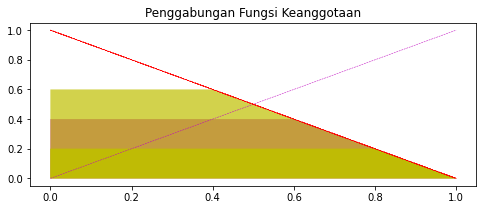

In [ ]:
fig, vis = plt.subplots(figsize=(8,3))
for i in range(len(a_act)):
  if i == 4:
    vis.fill_between(kualitas_air, activation_ka, a_act[i], facecolor='m', alpha=0.7)
    vis.plot(kualitas_air, ka_baik, 'm', linewidth=0.5, linestyle='--')

  else:
    vis.fill_between(kualitas_air, activation_ka, a_act[i], facecolor='y', alpha=0.7)
    vis.plot(kualitas_air, ka_buruk, 'r', linewidth=0.5, linestyle='--')

vis.set_title("Penggabungan Fungsi Keanggotaan")

In [ ]:
aggregate = np.fmax(a_act[0],
            np.fmax(a_act[1],
            np.fmax(a_act[2],
            np.fmax(a_act[3],
            np.fmax(a_act[4],
            np.fmax(a_act[5],
            np.fmax(a_act[6],
            np.fmax(a_act[7],a_act[8]))))))))

# Defuzzifikasi Mamdani

In [ ]:
KA2 = fuzzy.defuzz(kualitas_air, aggregate, 'mom')
KA_activation = fuzzy.interp_membership(kualitas_air, aggregate, KA2)

Text(0.5, 1.0, 'Hasil Grafik Mamdani')

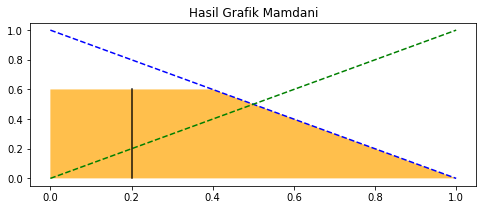

In [ ]:
fig, vis = plt.subplots(figsize=(8,3))
vis.plot(kualitas_air, ka_buruk, 'b', linewidth=1.5, linestyle='--')
vis.plot(kualitas_air, ka_baik, 'g', linewidth=1.5, linestyle='--')
vis.fill_between(kualitas_air, activation_ka, aggregate, facecolor='Orange', alpha=0.7)
vis.plot([KA2,KA2], [0,KA_activation], 'k', linewidth=1.5, alpha=0.9)
vis.set_title("Hasil Grafik Mamdani")

In [ ]:
if KA2 >= 0.5 :
  print("Kualitas Air Baik, dengan tingkat {} %".format(KA2))
else:
  print("Kualitas Air Buruk, dengan tingkat {} %".format(KA2))

Kualitas Air Buruk, dengan tingkat 0.2 %
